# Project: Investigate a Medical Appointment No Shows dataset

## Table of Contents:
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I investigate a dataset of appointment records. This dataset collects information from 100k medical appointments in Brazil and is focused on whether patients show up for their appointment.

> A number of characteristics about the patient are included in rows:
>- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
>- ‘Neighborhood’ indicates the location of the hospital.
>- ‘Scholarship’ indicates whether or not the patient is enrolled in the Brasilian welfare program Bolsa Família.
>- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Based on the dataset analysis, I will focus on putting more light on answers to the following questions:
1. How many percent of patients missed their scheduled appointment?
2. Does the patient's gender affect attendance?
3. Are there patients with more than one appointment? If yes, What are the top 10 patients with the most appointments?
4. Does age affect the visit?
5. What about the Scholarship on AppointmentDay?
6. What about the Handcap?
7. What about the SMSReceived?

#### Imoprt the necessary library

In [1]:
# Import the necessary library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


#### General Properties

In [2]:
# Importing the data into DataFrame and show investigate the first rows.
appointments = pd.read_csv('Medical Appointment No Shows.csv')
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Full view on the DataFrame about the number of the rows, columns, non-null values, and the type of the data.

In [3]:
# Full view on the DataFrame about the number of the rows, columns, non-null values, and the type of the data.
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Generate descriptive statistics from the DataFrame.
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# View the number of unique values for every column.
appointments.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
# Show how many duplicate values in the DataFrame
appointments.duplicated().sum()

0

>Great there is no duplicate values

### Some observations:
1. there are 110527 rows, 14 columns, and no NaNs.
2. There are 13 independent variables and one dependent(no-show) in the DataFrame.
3. The name of 'Scheduled_Day' and 'No-show' columns have dash and underscore, unlike the other columns.
4. 'ScheduledDay' and 'AppointmentDay' columns type should be changed to Datetime.
5. The 'Age' columns contain values less than 0 and greater than 100 Apparently in the descriptive statistics.
6. We can calculate 'AwaitingTimeDays' column from 'ScheduelDay' and 'AppointmentDay', To find how much time passed between a visit scheduling time and the actual visit time.
7. Also, we can show the distribution of the Show and NoShow appointments among days of the week. To do this we can create an 'AppointmentDown' column.

## Data Cleaning:

#### Observation 3: correct the name of the columns:

In [7]:
# Correct the name of SMS_received and No-show columns name.
appointments.rename(columns = {'SMS_received': 'SMSReceived', 'No-show': 'NoShow'}, inplace = True)
appointments.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMSReceived', 'NoShow'],
      dtype='object')

#### Observation 4: Convert ScheduledDay and AppointmentDay columns type to Datetime.

In [8]:
# Correct the data type of ScheduledDay and AppointmentDay columns to Datetime.
appointments['ScheduledDay'] = pd.to_datetime(appointments.ScheduledDay)
appointments['AppointmentDay'] = pd.to_datetime(appointments.AppointmentDay)
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMSReceived     110527 non-null  int64              
 13  NoShow        

#### Observation 5: Remove the Age outliers:

In [9]:
# get rid of outliers values from the Age column.
appointments = appointments[(appointments.Age > 0) & (appointments.Age < 100)]
appointments.shape

(106976, 14)

#### Observation 6: Create AwaitingTimeDays columns:

In [10]:
# Create a new column to store the number of days which patients wait until the appointment.
appointments['AwaitingTimeDays'] = (appointments.AppointmentDay - appointments.ScheduledDay).dt.days
appointments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106976 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   PatientId         106976 non-null  float64            
 1   AppointmentID     106976 non-null  int64              
 2   Gender            106976 non-null  object             
 3   ScheduledDay      106976 non-null  datetime64[ns, UTC]
 4   AppointmentDay    106976 non-null  datetime64[ns, UTC]
 5   Age               106976 non-null  int64              
 6   Neighbourhood     106976 non-null  object             
 7   Scholarship       106976 non-null  int64              
 8   Hipertension      106976 non-null  int64              
 9   Diabetes          106976 non-null  int64              
 10  Alcoholism        106976 non-null  int64              
 11  Handcap           106976 non-null  int64              
 12  SMSReceived       106976 non-null  int64    

#### Observation 7: Create AppointmentDown:

In [11]:
# Calculate the number of appointment which was down.
appointments['AppointmentDown'] = appointments.ScheduledDay.dt.day_name()
appointments['AppointmentDown'].value_counts()

Tuesday      25278
Wednesday    23544
Monday       22242
Friday       18372
Thursday     17518
Saturday        22
Name: AppointmentDown, dtype: int64

>The distribution of appointments among days of the week (Monday-Friday) is almost equal with a little bit fewer visits on Thursday and Friday. There are 24 visits on Saturday and none on Sunday.

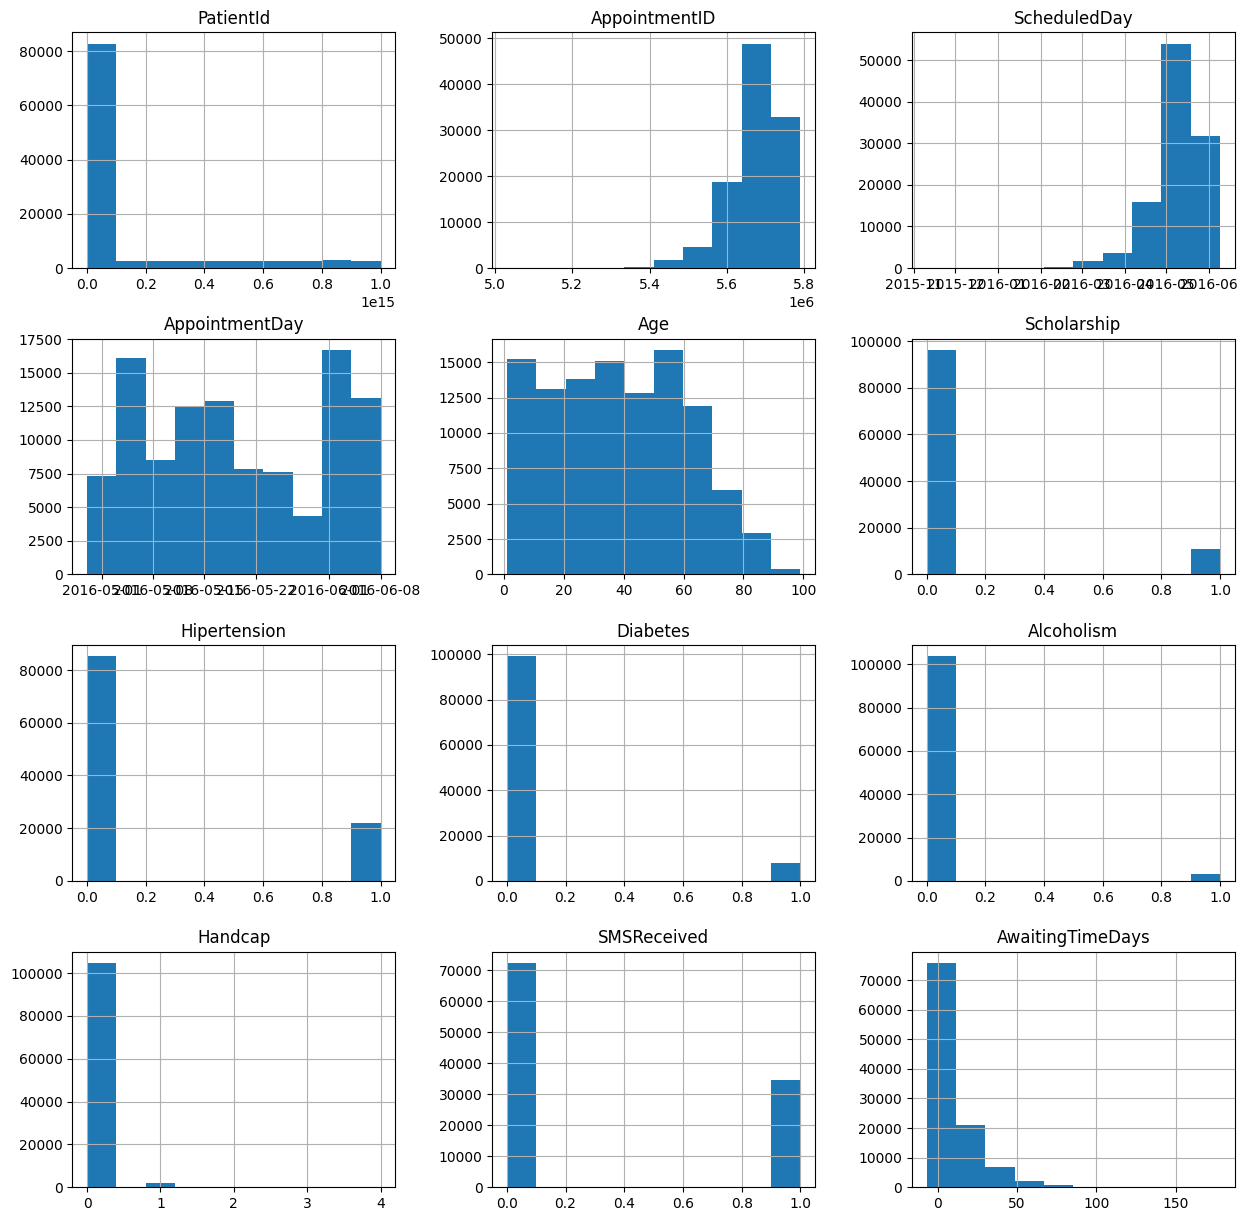

In [12]:
# Now let's visualize our DataFrame.
appointments.hist(figsize=(15, 15));

**From the Histograms:**
- **Age**: There are many very young people in the dataset but in general the patients age is distributed evenly and the number of patient's goes drastrically down for patients older than 60 years.
- **Alcoholism**: most of the patients are not alcoholics.
- **Diabetes**: Most of the patients are not diabetes but more of the people not being handicapped.
- **Handicap**: There are handicap categories with most of the people not being handicapped.
- **Hipertendsion**: Most patients do not have hypertension diagnosed.

<a id='eda'></a>
## Exploratory Data Analysis

In [13]:
# Define a function to visualize the data.
def countplot(column, title:str, label_1 = None, label_2 = None):
    ax = sns.countplot(x = column, hue = appointments.NoShow, data = appointments)
    ax.set_title(str(title))
    x_ticks_labels = [str(label_1), str(label_2)]
    ax.set_xticklabels(x_ticks_labels)
    plt.show()

In [14]:
# Define an other function to visualize the data without a label.
def countplot_no_label(column, title:str, hue_value = None):
    ax = sns.countplot(x = column, hue = hue_value, data = appointments)
    ax.set_title(str(title))
    plt.show()

#### 1. How many percent of patients missed their scheduled appointment?

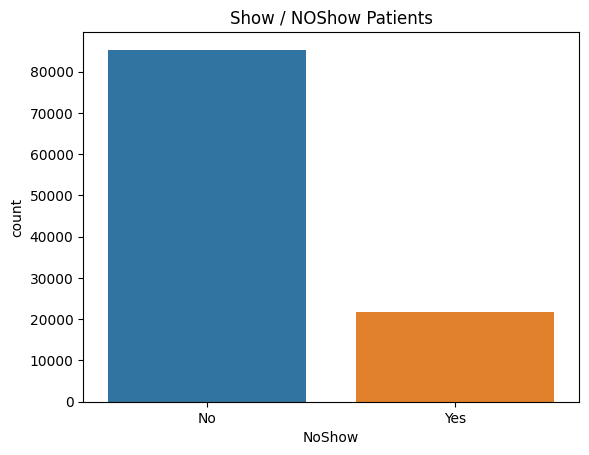

20% of appointments were missed


In [15]:
# Create visualization for patients which missed his appointmetn
all_appointments = appointments.shape[0]
missed_appointments = len(appointments.query('NoShow == \'Yes\''))
missed_ratio = int(round(missed_appointments/all_appointments * 100))

countplot_no_label(appointments.NoShow, "Show / NOShow Patients")

print(f"{missed_ratio}% of appointments were missed")

#### 2. Does the patient's gender affect attendance?

In [16]:
print(f"Unique values in 'Gender' is {appointments.Gender.unique()}")

Unique values in 'Gender' is ['F' 'M']


In [17]:
# Calculate the number of Females and Male.
appointments.Gender.value_counts()

F    70109
M    36867
Name: Gender, dtype: int64

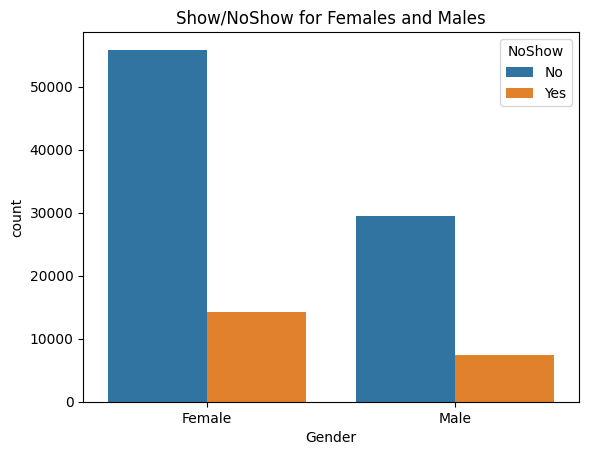

In [18]:
# visualize the number of Females and Male about attendance at the appointment.
countplot(appointments.Gender, "Show/NoShow for Females and Males", 'Female', 'Male')

>We can see that Of the 88,000 patients that appeared, about 57,000 were female and 31,000 were male. Of the 22,500 patients who did not come for a visit, about 15,000 were females and 7,500 were males. The ratio of females to males who attended appears to be the same as that which did not come to visit, and therefore gender does not affect
>- 26% for females.
>- 24% for males.

#### 3. Are there patients with more than one appointment? If yes, What are the top 10 patients with the most appointments?

In [19]:
# Find the top 10 patients which have the most appointments.
appointments.PatientId.value_counts().iloc[0: 10]

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
7.579746e+13    62
2.584244e+11    62
8.713749e+14    62
6.684488e+13    57
8.722785e+11    55
Name: PatientId, dtype: int64

>There are patients with multiple appointments. The number of appointments of tp 10 patients range from 88 to 55. The time range of visits appointed spans over 1.5 months, an appointment is most likely each examination or each specialist visit. So, within one patient visit in a hospital, there could be multiple appointments scheduled.

#### 4. Does age affect the visit?

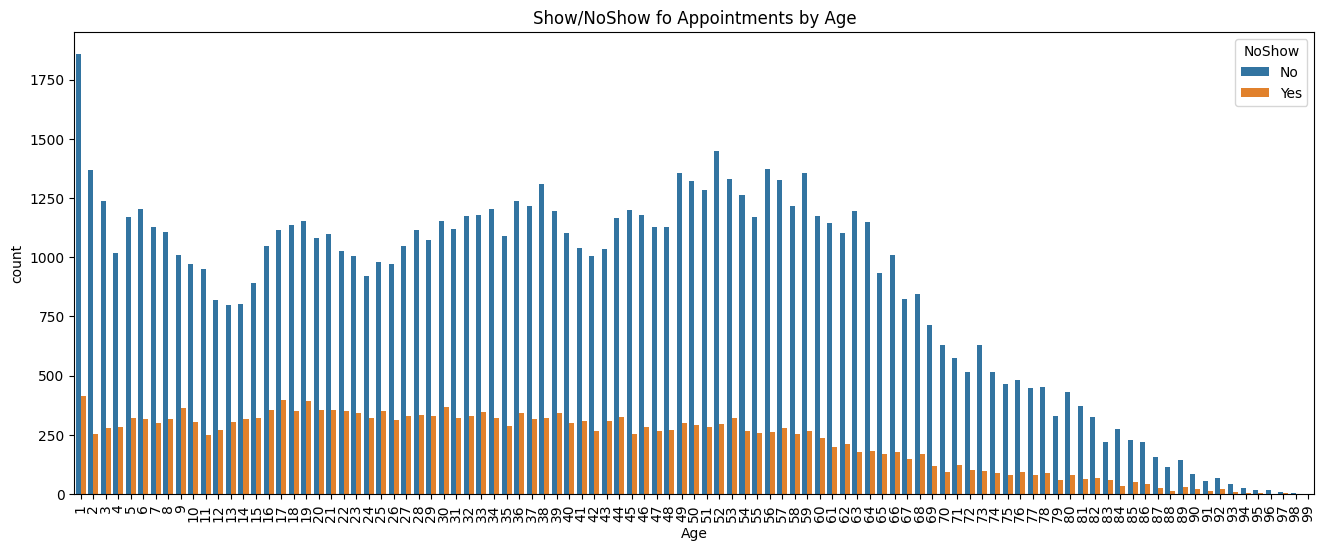

In [20]:
# We remove the outliers of Age in the clearing.
# Now, we make a visualization for the Age.
plt.figure(figsize = (16, 6))
plt.xticks(rotation = 90)

countplot_no_label(appointments.Age, "Show/NoShow fo Appointments by Age", appointments.NoShow)

>From the above visualization, it appears that The ratio of Show to NoShow is nearly the same for all ages except for "Age 0" and "Age 1". We will get better clarity on the ratio of Show to NoShow for all ages. So, age does not affect the commitment to visit much.

#### 5. What about the Scholarship on AppointmentDay?

In [21]:
appointments.Scholarship.value_counts()

0    96167
1    10809
Name: Scholarship, dtype: int64

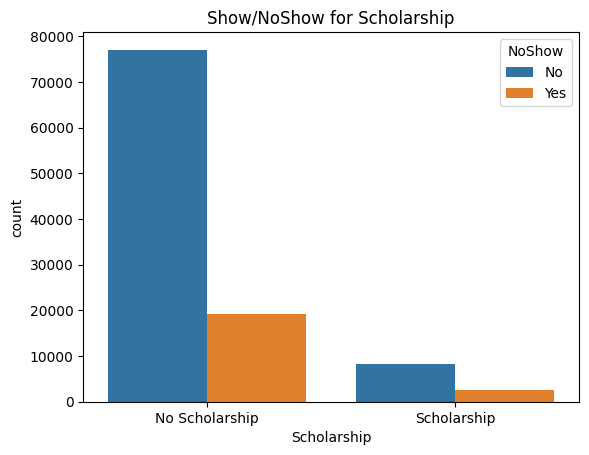

In [22]:
# Visualize the Scholarship.
countplot(appointments.Scholarship, "Show/NoShow for Scholarship", 'No Scholarship', 'Scholarship')

>From visualization can see there are around 100,000 patients without Scholarship and out of them around 80% have come from the visit. Out of the 10,800 patients with Scholarship around 75% of them have come for the visit. So, The Scholarship feature could help us in determining if a patient will turn up for the visit after an appointment.

#### 6. What about the Handcap?

In [23]:
appointments.Handcap.value_counts()

0    104742
1      2035
2       183
3        13
4         3
Name: Handcap, dtype: int64

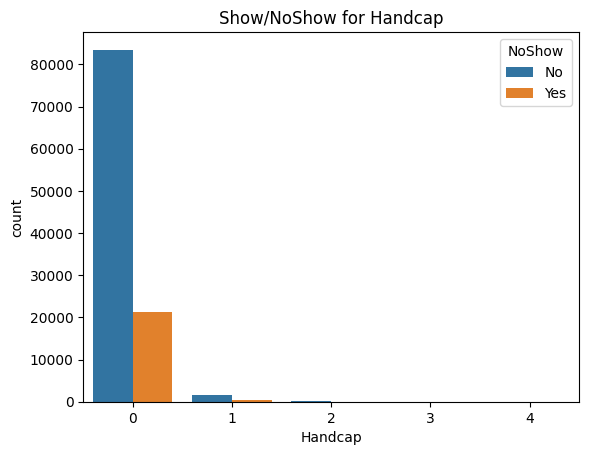

In [24]:
# Create a visualized for the Handcaps and their effect on the attend the appointment.
ax = sns.countplot(x = appointments.Handcap, hue = appointments.NoShow, data = appointments)
ax.set_title("Show/NoShow for Handcap")
plt.show()

In [25]:
countplot_no_label = (appointments.Handcap, "Show/NoShow for Handcap", appointments.NoShow)

>by visualizing, we can see that there are about 108,000 unobstructed patients and about 80% of them have come for a visit. Since we see a clear distinction between different levels of disability, this feature will help us determine if a patient will come for a visit after making an appointment.

#### 7. what about the SMSReceived?

In [26]:
appointments.SMSReceived.value_counts()

0    72393
1    34583
Name: SMSReceived, dtype: int64

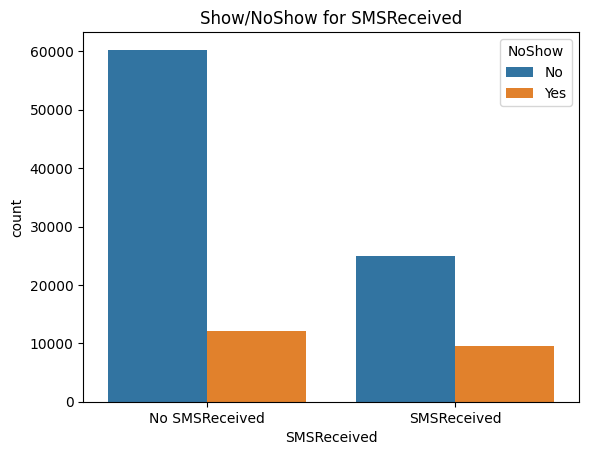

In [27]:
# visulaize the SMS messages and his affect on the attend the appointment.
countplot(appointments.SMSReceived, "Show/NoShow for SMSReceived", 'No SMSReceived', 'SMSReceived')

>Through visualization, we can see that there are about 75,000 patients who did not receive text messages, and about 84% of them attended the visit. Of the 35,500 patients who received text messages, about 72% attended the visit. This feature will help us determine if a patient will come for a visit after scheduling an appointment.

<a id='conclusions'></a>

## Conclusions
I have looked into the dataset and managed a few problems like unifying names, removing wrong data, adding new features based on existing data. I have also investigated most of the independent variables in the dataset and made a few observations comparing them to each other as well as to the dependent one(NoShow). As this was only an exploratory analysis, many potential correlations may remain uncovered. The data should be investigated further with more advanced statistical analysis to potentially reveal new insights and correlations.\
The most important findings are:

#### Results:
- Scheduling visits started on 2015-11-10 and ended on 2016-06-08.
- Visit appointments started on 2016-04-29 and ended on 2016-06-08.
- The distribution of appointments among days of the week (Monday-Friday) is almost equal with a bit fewer visits on Thursday and Friday. There are 24 visits on Saturday and none on Sunday.
- 10 days on average patients waited for an appointment. 50% of patients waited up to 4 days and 75% up to 15 days for an appointment. The longest waiting time was 179 days.
- Almost 40k patients scheduled their visit for the same day.
- Out of all patients scheduling an appointment for the same day (in total 38561), 1792 patients did not show up(5%).
- There are many very young people in the dataset (most of them of age 0) but in general the patient's age is distributed evenly and the number of patients goes drastrically down for patients older than 60 years.
- The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.
- There are handicap categories with most of the people not being handicapped.
- On average, 20% of appointments were missed.
- Out of 71831 appointments made by females, 14588 were missed with a ratio of 20%.
- Out of 38685 appointments made by males, 7723 were missed with a ratio of 20%.
- There are patients with multiple appointments. The number of appointments of the top 10 patients ranges from 88 to 55. Taking into consideration, that the time range of visits appointed spans over 3 months, an appointment is most likely each examination or each specialist visit. So within one patient visit in a hospital, there could be multiple appointments scheduled. One of the NoShow reasons could be the fact, that patients could be too tired to take part in all examinations during a particular visit. Or the open hours were not sufficient to show up in all appointments. There could be also other reasons. The high number of appointments over so short period of time should be consulted with an SMS to perform (or not) additional analysis in this area.
- The shorter the waiting period the more patients show up. Patients scheduling appointments for the same day are much more likely to show up (17% of not showing up only).

### Limitations:
- Some pieces of information are not clear in the description of the dataset, and you can only find that missing piece by looking out on the forum on some posts.
- We do not have confirmations of where the data comes from.
- There is no guarantee that the patientsId are being exposed correctly or even if it is an anonymous one.
- We don't have access to how many health units share the same patient dataset may causing some inconsistency in the data provided, maybe we have the same patient with different IDs or general data.
- Some information about the columns of the dataset was outdated, for example, the **handcap** is documented as "True/False" variable but in the dataset, it represents the number of disabilities of the patients.
- There are a few inconsistencies on the dataset that need to be verified for example, negative age values and weird scheduling dates.
- The analysis was limited to categorize the patient waiting time/amount of appointments and analyzing the mix of the attributes and I have a limited math skill, so it's not possible to provide relevant insights that could lead us to a relevant conclusion.